# EXPLORATORY DATA ANALISYS (EDA)

### Este notebook muestra el análisis exporatorio de datos


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("C:/Users/Fernando/Desktop/Proyecto_Final_ML/src")
import eda 

In [2]:
# Dataset loading

data = pd.read_csv("../data/data_train.csv", index_col=0)
# data = data.set_index("Complaint ID")

In [3]:
data.columns

Index(['Complaint ID', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'State',
       'ZIP code', 'Date received', 'Date sent to company', 'Company',
       'Company response', 'Timely response?', 'Consumer disputed?'],
      dtype='object')

In [4]:
data.columns

Index(['Complaint ID', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'State',
       'ZIP code', 'Date received', 'Date sent to company', 'Company',
       'Company response', 'Timely response?', 'Consumer disputed?'],
      dtype='object')

In [5]:
data["Company response"].unique()

array(['Closed with explanation', 'Closed with non-monetary relief',
       'Closed', 'In progress', 'Closed with monetary relief',
       'Untimely response'], dtype=object)

In [6]:
# Skrub visualization. This let us to explore different things about features such as data type, missing data, distributions...

from skrub import TableReport

TableReport(data)

Processing column  13 / 13


,,,,,,,,,,,,,


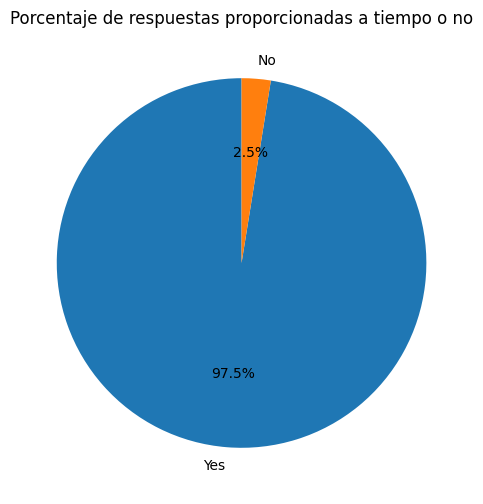

In [34]:
percentage_of_timely_response = data["Timely response?"].value_counts()


plt.figure(figsize=(6,6))
plt.pie(percentage_of_timely_response, labels=percentage_of_timely_response.index, autopct='%1.1f%%', startangle=90)
plt.title("Porcentaje de respuestas proporcionadas a tiempo o no")
plt.show()

In [35]:
data["State"].unique()

array(['TX', 'KS', 'NY', 'CT', nan, 'MS', 'UT', 'FL', 'AZ', 'VA', 'NV',
       'MD', 'CA', 'OR', 'DE', 'IL', 'LA', 'NJ', 'SC', 'OH', 'ID', 'WA',
       'MO', 'ME', 'PA', 'AL', 'IA', 'PR', 'CO', 'KY', 'IN', 'MN', 'NE',
       'GA', 'NC', 'MA', 'WI', 'MI', 'AR', 'OK', 'TN', 'NH', 'WV', 'SD',
       'AK', 'DC', 'NM', 'WY', 'RI', 'VT', 'HI', 'MH', 'VI', 'AP', 'MT',
       'AS', 'ND', 'GU', 'AE', 'PW'], dtype=object)

In [36]:
# Porcentaje de valores no nulos de consumer disputed:

len(data[~data["Consumer disputed?"].isnull()])/len(data)*100

21.26176522820103

In [37]:
## Numero de días que transcurren entre recibir la queja y el envío a la empresa
import datetime as dt

data["Date received"] = pd.to_datetime(data["Date received"], errors = "coerce")
data["Date sent to company"] = pd.to_datetime(data["Date sent to company"], errors = "coerce")

data["Dias entre recibo y envio"] = (data["Date received"] - data["Date sent to company"]).dt.days
data["Dias entre recibo y envio"] = data["Dias entre recibo y envio"].apply(lambda x: x*-1)

In [38]:
# Proporción de la cantidad de dias de retraso entre que se recibe el reclamo y es enviada a la empresa

data["Dias entre recibo y envio"].value_counts(normalize=True)

Dias entre recibo y envio
0     0.460398
1     0.156455
5     0.073344
6     0.066729
3     0.059270
7     0.053188
4     0.035207
2     0.021311
8     0.013142
9     0.006260
10    0.004884
13    0.003863
11    0.003729
19    0.003463
15    0.003152
14    0.002975
12    0.002841
21    0.002708
18    0.002264
20    0.002042
17    0.001909
22    0.001776
16    0.001554
35    0.001510
27    0.001154
23    0.001154
24    0.001110
26    0.001066
42    0.001021
25    0.000888
36    0.000888
29    0.000844
30    0.000844
31    0.000799
28    0.000755
34    0.000622
39    0.000577
32    0.000577
37    0.000533
43    0.000444
45    0.000400
33    0.000355
41    0.000355
44    0.000266
40    0.000266
38    0.000266
46    0.000222
48    0.000178
61    0.000089
47    0.000089
60    0.000044
55    0.000044
57    0.000044
53    0.000044
64    0.000044
59    0.000044
Name: proportion, dtype: float64

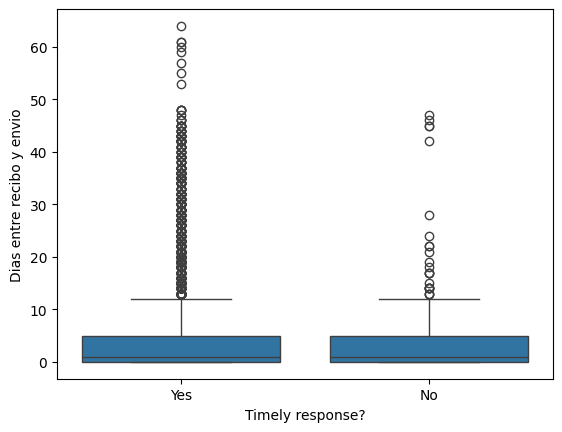

In [39]:
##Boxplot entre los días de retraso y si la queja fue respondida a tiempo
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Timely response?", y="Dias entre recibo y envio", data=data)
plt.show()

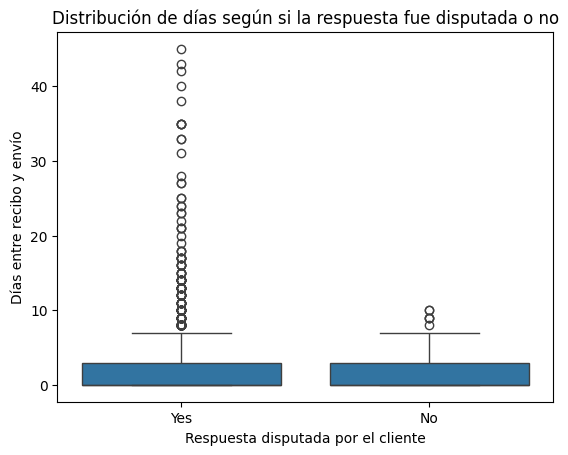

In [40]:
# Boxplot entre los días de retraso y si la respuesta fue reclamada por el cliente
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Consumer disputed?", y="Dias entre recibo y envio", data=data)
plt.xlabel("Respuesta disputada por el cliente")   
plt.ylabel("Días entre recibo y envío")  
plt.title("Distribución de días según si la respuesta fue disputada o no")  
plt.show()

Parece que las respuestas reclamadas por los clientes están asociadas a un mayor número de días de retraso entre que se recibió la queja y se envió a la compañía.

In [41]:
x = data[data["Company response"] == "Untimely response"]
x["Timely response?"].value_counts()

Timely response?
No     280
Yes      1
Name: count, dtype: int64

- Existen algunas incongruencias entre la columna Company response y Timely response? respecto a la catalogación como quejas respondidas a tiempo. 

In [42]:
data["Company"].value_counts().sort_values(ascending=False).head(27)

Company
Equifax                                1642
Experian                               1568
TransUnion                             1230
Bank of America                        1211
Wells Fargo                            1153
JPMorgan Chase                          999
Citibank                                785
Ocwen                                   748
Nationstar Mortgage                     602
Capital One                             453
GE Capital Retail                       381
U.S. Bancorp                            339
Enhanced Recovery Company, LLC          331
Encore Capital Group                    308
Green Tree Servicing, LLC               305
Discover                                302
Navient                                 296
Amex                                    216
PNC Bank                                196
Portfolio Recovery Associates, Inc.     194
TD Bank                                 180
Select Portfolio Servicing, Inc         174
Transworld Systems Inc. 

## Columns description


| **Column**               | **Meaning**                                                                                         |
| ------------------------ | --------------------------------------------------------------------------------------------------- |
| **Complaint ID**         | Unique identifier of the submitted complaint                                                        |
| **Product**              | Type of financial product involved (e.g., *Credit card*, *Mortgage*, *Loan*)                        |
| **Sub-product**          | Subcategory of the product (e.g., *Auto loan*, *FHA mortgage*, *Debit card*)                        |
| **Issue**                | Main topic of the complaint (e.g., *Incorrect information on credit report*)                        |
| **Sub-issue**            | More specific detail of the issue (e.g., *Account status incorrect*)                                |
| **State**                | Consumer's state of residence (e.g., *CA*, *NY*, etc.)                                              |
| **ZIP code**             | Consumer's ZIP/postal code                                                                          |
| **Date received**        | Date the agency received the complaint                                                              |
| **Date sent to company** | Date the complaint was forwarded to the financial company                                           |
| **Company**              | Name of the financial institution involved                                                          |
| **Company response**     | Official response from the company (e.g., *Closed with explanation*, *Closed with monetary relief*) |
| **Timely response?**     | Whether the company responded within the regulatory time frame (usually 15 days)                    |
| **Consumer disputed?**   | Whether the co                                                                                      |




First of all, Checking for duplicated values.

In [43]:
data[data.duplicated(keep=False)] # There aren't duplicated values

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,Dias entre recibo y envio


There are some of features that have a high cardinality (>40 unique values). We'll work with them later but first we're going to look closely at the features that have less than 40 unique values (Product, Company response, Timely response?, Consumer disputed?)

In [44]:
# Information of features using pandas

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22524 entries, 19787 to 24168
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Complaint ID               22524 non-null  int64         
 1   Product                    22524 non-null  object        
 2   Sub-product                14029 non-null  object        
 3   Issue                      22524 non-null  object        
 4   Sub-issue                  10565 non-null  object        
 5   State                      22189 non-null  object        
 6   ZIP code                   22299 non-null  float64       
 7   Date received              22524 non-null  datetime64[ns]
 8   Date sent to company       22524 non-null  datetime64[ns]
 9   Company                    22524 non-null  object        
 10  Company response           22524 non-null  object        
 11  Timely response?           22524 non-null  object        
 12  Consu

### Visualization of features with low cardinality (less than 40 unique values)

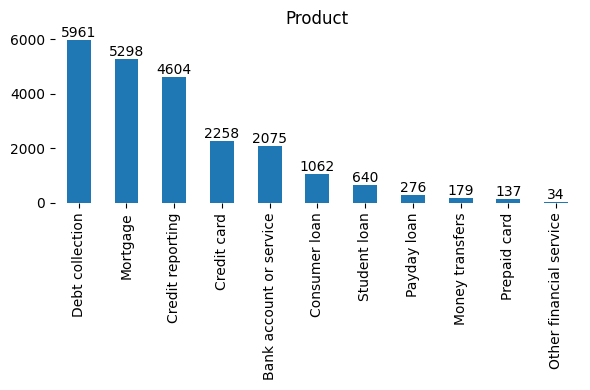

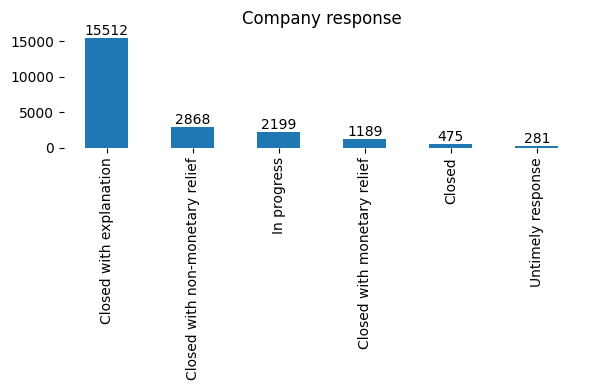

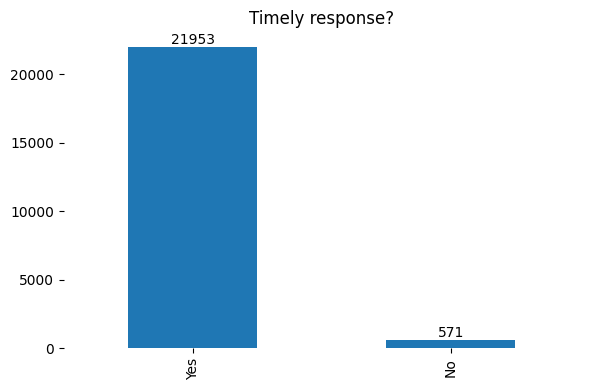

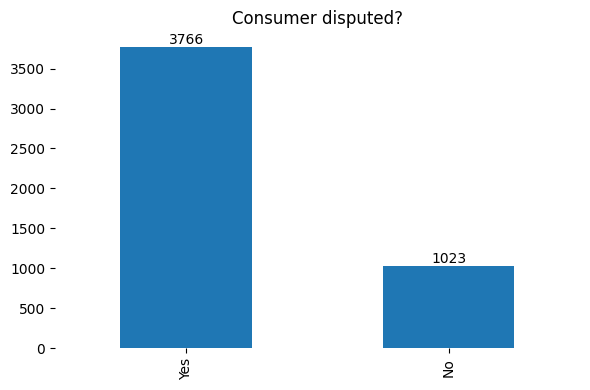

In [45]:
features_with_low_cardinality = [i for i in data.columns if len(data[i].unique()) < 40]
eda.visualization_features(data,*features_with_low_cardinality)

## MISSING VALUES

In [46]:
eda.missing_values(data, *list(data.columns))

,feature,missing_values
0,Complaint ID,0
1,Product,0
2,Sub-product,8495
3,Issue,0
4,Sub-issue,11959
5,State,335
6,ZIP code,225
7,Date received,0
8,Date sent to company,0
9,Company,0


These analyses show how features with low cardinality are imbalanced, except Product. Among all fo them, Company response seems to be the best option as target feature since the imbalance can be compesated by resizing of the values.

### Análisis de las respuestas de las empresas

In [47]:
# Eliminacion de los valores "In progress" y "Untimely response" de la columna de
# respuesta de la compañia

data_company_response_binary = data[~data["Company response"].isin(["In progress", "Untimely response"])]


In [48]:
# Creación del diccionario con los valores para codificar la columna Company reponse.
estado_respuesta = {'Closed with monetary relief': "cerrado con compensación", 
       'Closed with non-monetary relief':"cerrado con compensación", 
       'Closed with explanation': "cerrado sin compensación", 'Closed': "cerrado sin compensación"}

data_company_response_binary["Company response"] = data_company_response_binary["Company response"].map(estado_respuesta)

C:\Users\Fernando\AppData\Local\Temp\ipykernel_13892\119783871.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_company_response_binary["Company response"] = data_company_response_binary["Company response"].map(estado_respuesta)


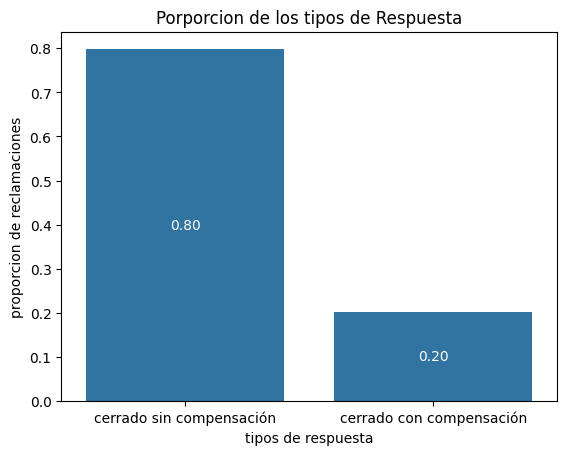

In [51]:
# Porcentaje de las respuestas con compensacion y sin compensacion
# despues de la binarizacion

percentage_binary_response = data_company_response_binary["Company response"].value_counts(normalize=True)

ax = sns.barplot(x=percentage_binary_response.index, y=percentage_binary_response)
for i, v in enumerate(percentage_binary_response):
    ax.text(i, v/2, f"{v:.2f}", ha='center', va='center', color='white', fontsize=10)

plt.ylabel("proporcion de reclamaciones")
plt.xlabel("tipos de respuesta")
plt.title("Porporcion de los tipos de Respuesta")
plt.show()

In [53]:
percentage_of_timely_response = data_company_response_binary["Timely response?"].value_counts(normalize=True)

- Casi un 2% de los respuestas proporcionadas por las empresas no se hicieron dentro del periodo de los 15 días posteiores a la reclamación.

In [54]:
## DataFrame con las respuestas que no fueron respondidas dentro de los 15 días estipulados

responses_no_timely = data_company_response_binary[data_company_response_binary["Timely response?"] == "No"]

In [55]:
responses_no_timely["Company response"].value_counts(normalize=True)

Company response
cerrado sin compensación    0.879518
cerrado con compensación    0.120482
Name: proportion, dtype: float64

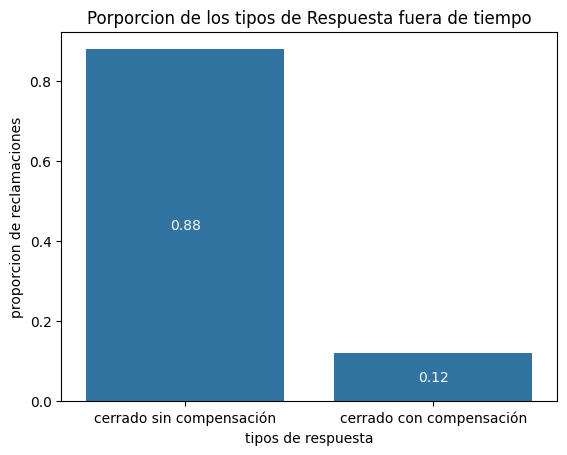

In [57]:
percentage_binary_response_no_timely = responses_no_timely["Company response"].value_counts(normalize=True)

ax = sns.barplot(x=percentage_binary_response_no_timely.index, y=percentage_binary_response_no_timely)
for i, v in enumerate(percentage_binary_response_no_timely):
    ax.text(i, v/2, f"{v:.2f}", ha='center', va='center', color='white', fontsize=10)

plt.ylabel("proporcion de reclamaciones")
plt.xlabel("tipos de respuesta")
plt.title("Porporcion de los tipos de Respuesta fuera de tiempo")
plt.show()

- Un 12% de las quejas no respondidas a tiempo y de las que existe información de si la compañia llevó algún tipo de acción o no, corresponde al tipo de "cerrado con acción", es decir, se solventó con algún tipo de rectificación o arreglo que implicó movimiento monetario o no.

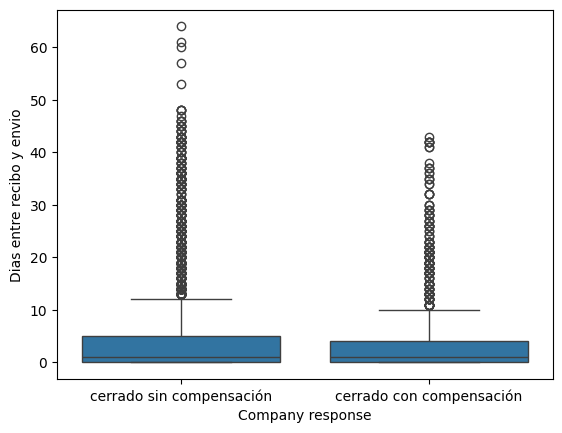

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Company response", y="Dias entre recibo y envio", data=data_company_response_binary)
plt.show()

No parece haber una correlación entre los días de retraso entre recibir los quejas y enviarlas a las empresas y el que las quejas requieran compensación o no.

## Creación de un informe con ydata-profiling

In [7]:
## YDATA-Profiling

from ydata_profiling import ProfileReport

profile = ProfileReport(data, title = "Profiling Report",  correlations={"auto": {"calculate": True}})

In [8]:
# Guardado en archivo html para visualización con el navegador

profile.to_file("Informe de dataset.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]